In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [25]:
df_org = pd.read_csv("Sepsis_Cases_Log.csv")

In [26]:
df = df_org.drop(columns=['org:group', 'Complete Timestamp', 'Variant', 'Variant index', 'Diagnose', 'lifecycle:transition'])

In [27]:
df.head()

,Case ID,Activity,InfectionSuspected,DiagnosticBlood,DisfuncOrg,SIRSCritTachypnea,Hypotensie,SIRSCritHeartRate,Infusion,DiagnosticArtAstrup,...,DiagnosticUrinaryCulture,SIRSCritLeucos,Oligurie,DiagnosticLacticAcid,Hypoxie,DiagnosticUrinarySediment,DiagnosticECG,Leucocytes,CRP,LacticAcid
0,A,ER Registration,True,True,True,True,True,True,True,True,...,True,False,False,True,False,True,True,NaN,NaN,NaN
1,A,Leucocytes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.6,NaN,NaN
2,A,CRP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,NaN
3,A,LacticAcid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.2
4,A,ER Triage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
df_act_flow = pd.DataFrame()

# Loop through each unique Case ID
for case in df['Case ID'].unique():
    # Filter the merged_df for the current Case ID
    case_merged_df = df[df['Case ID'] == case]
    
    # Extract the activities as a list
    activity_flow = case_merged_df['Activity'].tolist()
    
    # Add the Case ID as the first column and the activities as subsequent columns
    row_merged_df = [case] + activity_flow
    
    # Append the row to the final DataFrame
    df_act_flow = pd.concat([df_act_flow, pd.DataFrame([row_merged_df])], ignore_index=True)

# Rename columns: first column as 'Case ID', remaining columns as 'Activity 1', 'Activity 2', etc.
columns = ['Case ID'] + [f'Activity {i+1}' for i in range(df_act_flow.shape[1] - 1)]
df_act_flow.columns = columns

# Inspect the resulting DataFrame
print(df_act_flow.head(10))



  Case ID       Activity 1  Activity 2        Activity 3      Activity 4  \
0       A  ER Registration  Leucocytes               CRP      LacticAcid   
1       B  ER Registration   ER Triage               CRP      LacticAcid   
2       C  ER Registration   ER Triage  ER Sepsis Triage      Leucocytes   
3       D  ER Registration   ER Triage  ER Sepsis Triage             CRP   
4       E  ER Registration   ER Triage  ER Sepsis Triage       IV Liquid   
5       F  ER Registration   ER Triage  ER Sepsis Triage      Leucocytes   
6       G  ER Registration   ER Triage  ER Sepsis Triage       IV Liquid   
7       H  ER Registration   ER Triage  ER Sepsis Triage             CRP   
8       I  ER Registration   ER Triage  ER Sepsis Triage  IV Antibiotics   
9       J  ER Registration   ER Triage  ER Sepsis Triage             CRP   

       Activity 5        Activity 6      Activity 7      Activity 8  \
0       ER Triage  ER Sepsis Triage       IV Liquid  IV Antibiotics   
1      Leucocytes  ER

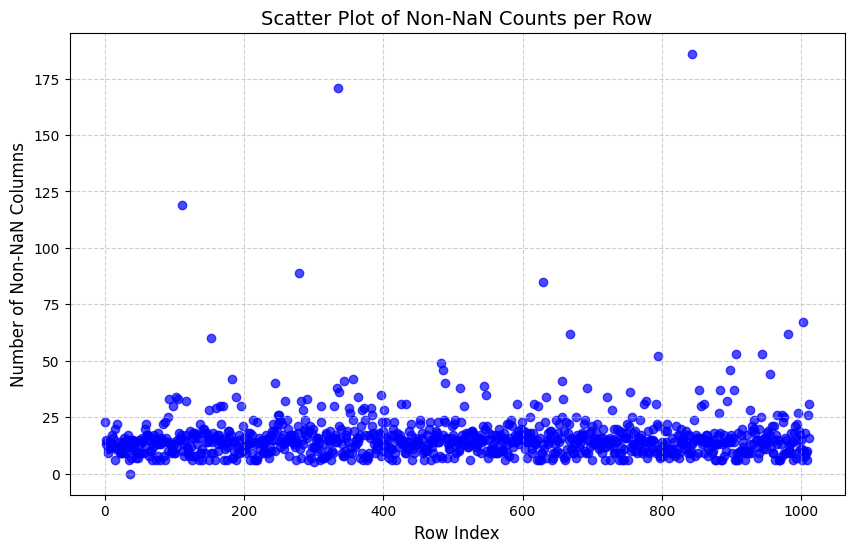

In [29]:

# Step 1: Count the number of non-NaN values for each row
df_act_flow['Non-NaN Count'] = df_act_flow.notnull().sum(axis=1)

# Step 2: Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_act_flow.index, df_act_flow['Non-NaN Count'], alpha=0.7, color='blue')
plt.title('Scatter Plot of Non-NaN Counts per Row', fontsize=14)
plt.xlabel('Row Index', fontsize=12)
plt.ylabel('Number of Non-NaN Columns', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


In [30]:
# Step 1: Count the number of non-NaN values for each row
df_act_flow['Non-NaN Count'] = df_act_flow.notnull().sum(axis=1)

# Step 2: Filter rows to keep only those with Non-NaN Count <= 50
df_act_flow_filtered = df_act_flow[(df_act_flow['Non-NaN Count'] >= 4) & (df_act_flow['Non-NaN Count'] <= 50)]

# Step 3: Drop the 'Non-NaN Count' column as it is no longer needed
df_act_flow_filtered = df_act_flow_filtered.drop(columns=['Non-NaN Count'])

# Display the filtered merged_dfFrame
df_act_flow_filtered.head()


,Case ID,Activity 1,Activity 2,Activity 3,Activity 4,Activity 5,Activity 6,Activity 7,Activity 8,Activity 9,...,Activity 176,Activity 177,Activity 178,Activity 179,Activity 180,Activity 181,Activity 182,Activity 183,Activity 184,Activity 185
0,A,ER Registration,Leucocytes,CRP,LacticAcid,ER Triage,ER Sepsis Triage,IV Liquid,IV Antibiotics,Admission NC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,B,ER Registration,ER Triage,CRP,LacticAcid,Leucocytes,ER Sepsis Triage,IV Liquid,IV Antibiotics,Admission NC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,C,ER Registration,ER Triage,ER Sepsis Triage,Leucocytes,CRP,IV Liquid,IV Antibiotics,Admission NC,Admission NC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,D,ER Registration,ER Triage,ER Sepsis Triage,CRP,LacticAcid,Leucocytes,IV Liquid,IV Antibiotics,Admission NC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,E,ER Registration,ER Triage,ER Sepsis Triage,IV Liquid,CRP,Leucocytes,LacticAcid,IV Antibiotics,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
# Step 4: Keep only the first 52 columns
df_act_flow_filtered = df_act_flow_filtered.iloc[:, :50]

# Display the updated merged_dfFrame
df_act_flow_filtered.head()


,Case ID,Activity 1,Activity 2,Activity 3,Activity 4,Activity 5,Activity 6,Activity 7,Activity 8,Activity 9,...,Activity 40,Activity 41,Activity 42,Activity 43,Activity 44,Activity 45,Activity 46,Activity 47,Activity 48,Activity 49
0,A,ER Registration,Leucocytes,CRP,LacticAcid,ER Triage,ER Sepsis Triage,IV Liquid,IV Antibiotics,Admission NC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,B,ER Registration,ER Triage,CRP,LacticAcid,Leucocytes,ER Sepsis Triage,IV Liquid,IV Antibiotics,Admission NC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,C,ER Registration,ER Triage,ER Sepsis Triage,Leucocytes,CRP,IV Liquid,IV Antibiotics,Admission NC,Admission NC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,D,ER Registration,ER Triage,ER Sepsis Triage,CRP,LacticAcid,Leucocytes,IV Liquid,IV Antibiotics,Admission NC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,E,ER Registration,ER Triage,ER Sepsis Triage,IV Liquid,CRP,Leucocytes,LacticAcid,IV Antibiotics,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
df_act_flow_filtered.shape

(1000, 50)

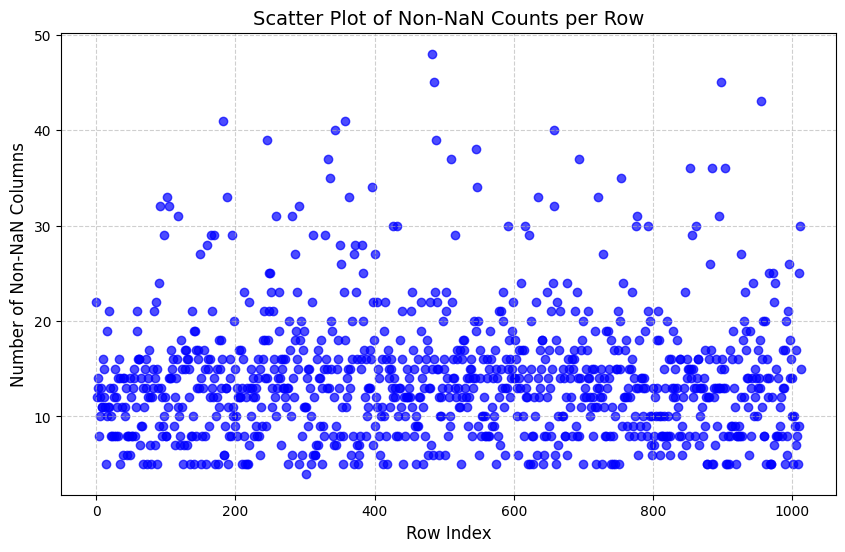

In [33]:

# Step 1: Count the number of non-NaN values for each row
df_act_flow_filtered['Non-NaN Count'] = df_act_flow_filtered.notnull().sum(axis=1) -1

# Step 2: Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_act_flow_filtered.index, df_act_flow_filtered['Non-NaN Count'], alpha=0.7, color='blue')
plt.title('Scatter Plot of Non-NaN Counts per Row', fontsize=14)
plt.xlabel('Row Index', fontsize=12)
plt.ylabel('Number of Non-NaN Columns', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


In [34]:
# Filter the merged_dfFrame to include only rows where Activity == 'ER Registration'
df_er_registration = df[df['Activity'] == 'ER Registration']

# Reset index for cleanliness (optional)
df_er_registration = df_er_registration.reset_index(drop=True)

df_er_registration.shape

(1013, 28)

In [35]:
df_other_attributes = df_er_registration.drop(columns=['Activity', 'Leucocytes', 'CRP', 'LacticAcid'])
df_other_attributes.head()

,Case ID,InfectionSuspected,DiagnosticBlood,DisfuncOrg,SIRSCritTachypnea,Hypotensie,SIRSCritHeartRate,Infusion,DiagnosticArtAstrup,Age,...,SIRSCriteria2OrMore,DiagnosticXthorax,SIRSCritTemperature,DiagnosticUrinaryCulture,SIRSCritLeucos,Oligurie,DiagnosticLacticAcid,Hypoxie,DiagnosticUrinarySediment,DiagnosticECG
0,A,True,True,True,True,True,True,True,True,85.0,...,True,True,True,True,False,False,True,False,True,True
1,B,True,True,False,True,False,True,True,False,45.0,...,True,True,True,True,False,False,True,False,True,True
2,C,True,True,False,False,False,True,True,True,55.0,...,True,False,True,True,False,False,True,False,True,True
3,D,True,True,False,True,False,True,True,True,70.0,...,True,True,True,False,False,False,True,False,False,True
4,E,True,True,False,True,False,True,True,True,75.0,...,True,True,True,True,False,False,True,False,True,True


In [36]:
df_diagnosis = df[['Case ID', 'Activity','Leucocytes', 'CRP', 'LacticAcid']]
df_diagnosis = df_diagnosis.dropna(subset=['Leucocytes', 'CRP', 'LacticAcid'], how='all', ignore_index=True)
columns_to_convert = ['Leucocytes', 'CRP', 'LacticAcid']
df_diagnosis[columns_to_convert]=df_diagnosis[columns_to_convert].astype(float)
df_diagnosis.head(20)

,Case ID,Activity,Leucocytes,CRP,LacticAcid
0,A,Leucocytes,9.6,NaN,NaN
1,A,CRP,NaN,21.0,NaN
2,A,LacticAcid,NaN,NaN,2.2
3,A,CRP,NaN,109.0,NaN
4,A,Leucocytes,8.7,NaN,NaN
5,A,Leucocytes,9.6,NaN,NaN
6,A,CRP,NaN,47.0,NaN
7,A,Leucocytes,10.7,NaN,NaN
8,A,CRP,NaN,15.0,NaN
9,A,CRP,NaN,9.0,NaN


In [37]:
df_other_attributes.shape

(1013, 24)

In [38]:
# Exclude the 'Case ID' and 'Age' columns
columns_to_count = [col for col in df_other_attributes.columns if col not in ['Case ID', 'Age']]

# Create a dictionary to store counts of True and False for each column
true_false_counts = {col: df_other_attributes[col].value_counts() for col in columns_to_count}

# Convert the counts to a DataFrame for better readability
result_df = pd.DataFrame(true_false_counts).fillna(0).astype(int).T  # Transpose for better display
result_df.columns = ['False', 'True']  # Rename the columns
result_df = result_df[['True', 'False']]  # Reorder for clarity

print(result_df)


                           True  False
InfectionSuspected          848    165
DiagnosticBlood             823    190
DisfuncOrg                   69    944
SIRSCritTachypnea           601    412
Hypotensie                   54    959
SIRSCritHeartRate           810    203
Infusion                    796    217
DiagnosticArtAstrup         297    716
DiagnosticIC                848    165
DiagnosticSputum             29    984
DiagnosticLiquor              5   1008
DiagnosticOther              10   1003
SIRSCriteria2OrMore         853    160
DiagnosticXthorax           785    228
SIRSCritTemperature         800    213
DiagnosticUrinaryCulture    476    537
SIRSCritLeucos               49    964
Oligurie                     25    988
DiagnosticLacticAcid        804    209
Hypoxie                      20    993
DiagnosticUrinarySediment   519    494
DiagnosticECG               765    248


In [39]:
# List of columns to drop
columns_to_drop = ['DiagnosticLiquor', 'DiagnosticOther', 'SIRSCritLeucos', 'Oligurie', 'Hypoxie']

# Drop the columns from the DataFrame
df_other_attributes = df_other_attributes.drop(columns=columns_to_drop)

# Verify the remaining columns
print(df_other_attributes.columns)


Index(['Case ID', 'InfectionSuspected', 'DiagnosticBlood', 'DisfuncOrg',
       'SIRSCritTachypnea', 'Hypotensie', 'SIRSCritHeartRate', 'Infusion',
       'DiagnosticArtAstrup', 'Age', 'DiagnosticIC', 'DiagnosticSputum',
       'SIRSCriteria2OrMore', 'DiagnosticXthorax', 'SIRSCritTemperature',
       'DiagnosticUrinaryCulture', 'DiagnosticLacticAcid',
       'DiagnosticUrinarySediment', 'DiagnosticECG'],
      dtype='object')


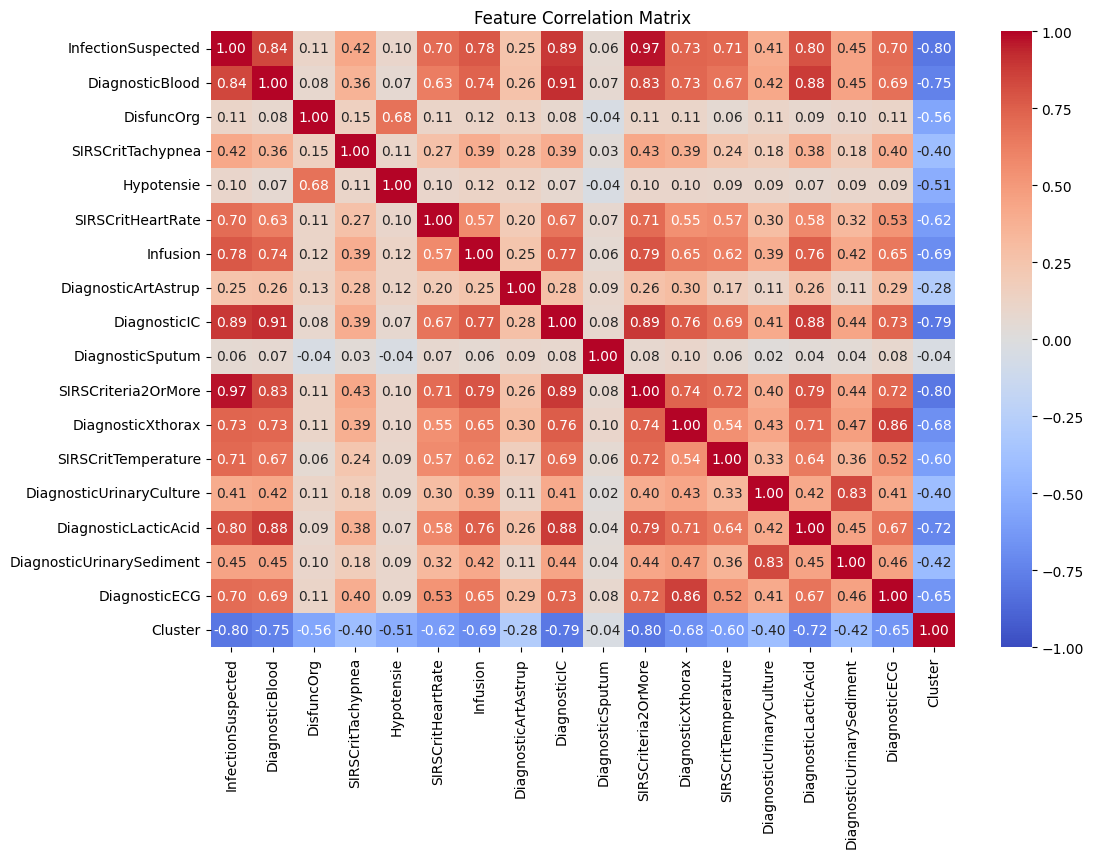

In [64]:
# Select only boolean and numeric columns, excluding "Case ID" and "Age"
columns_to_exclude = ["Case ID", "Age"]
numeric_data = df_other_attributes.drop(columns=columns_to_exclude)

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()


# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)
plt.title("Feature Correlation Matrix")
plt.show()


In [88]:
# Set correlation threshold
correlation_threshold = 0.85


# Find features with high correlation
high_correlation_pairs = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            colname_i = correlation_matrix.columns[i]
            colname_j = correlation_matrix.columns[j]
            high_correlation_pairs.add((colname_i, colname_j))

print(f"Highly correlated pairs (|corr| > {correlation_threshold}):")
for pair in high_correlation_pairs:
    print(pair)

# Identify features to drop (keep one from each pair)
features_to_drop = set()
for feature1, feature2 in high_correlation_pairs:
    # Keep the first feature and drop the second (or customize this logic)
    features_to_drop.add(feature2)

# Drop the identified features
df_reduced = df_other_attributes.drop(columns=features_to_drop)

print(f"Dropped features: {features_to_drop}")
print(f"Remaining features: {df_reduced.columns.tolist()}")


Highly correlated pairs (|corr| > 0.85):
('DiagnosticLacticAcid', 'DiagnosticIC')
('DiagnosticLacticAcid', 'DiagnosticBlood')
('DiagnosticIC', 'DiagnosticBlood')
('DiagnosticIC', 'InfectionSuspected')
('SIRSCriteria2OrMore', 'DiagnosticIC')
('SIRSCriteria2OrMore', 'InfectionSuspected')
('DiagnosticECG', 'DiagnosticXthorax')
Dropped features: {'DiagnosticXthorax', 'DiagnosticIC', 'DiagnosticBlood', 'InfectionSuspected'}
Remaining features: ['Case ID', 'DisfuncOrg', 'SIRSCritTachypnea', 'Hypotensie', 'SIRSCritHeartRate', 'Infusion', 'DiagnosticArtAstrup', 'Age', 'DiagnosticSputum', 'SIRSCriteria2OrMore', 'SIRSCritTemperature', 'DiagnosticUrinaryCulture', 'DiagnosticLacticAcid', 'DiagnosticUrinarySediment', 'DiagnosticECG', 'Cluster']


In [66]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Prepare data for clustering (exclude Case ID or other non-numeric columns)
data_for_clustering = df_other_attributes.drop(columns=["Case ID"])  # Replace "Case ID" if necessary

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_clustering)

# Perform K-Means clustering
n_clusters = 3  # Adjust based on your elbow method or preference
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
df_other_attributes["Cluster"] = kmeans.fit_predict(scaled_data)

# Inspect the clustering results
print(df_other_attributes[["Case ID", "Cluster"]])

# Save clustered data to a CSV
df_other_attributes.to_csv("clustered_data.csv", index=False)


     Case ID  Cluster
1          B        1
2          C        1
3          D        1
4          E        1
5          F        1
...      ...      ...
1008     ENA        1
1009     FNA        1
1010     GNA        1
1011     HNA        1
1012     KNA        1

[870 rows x 2 columns]


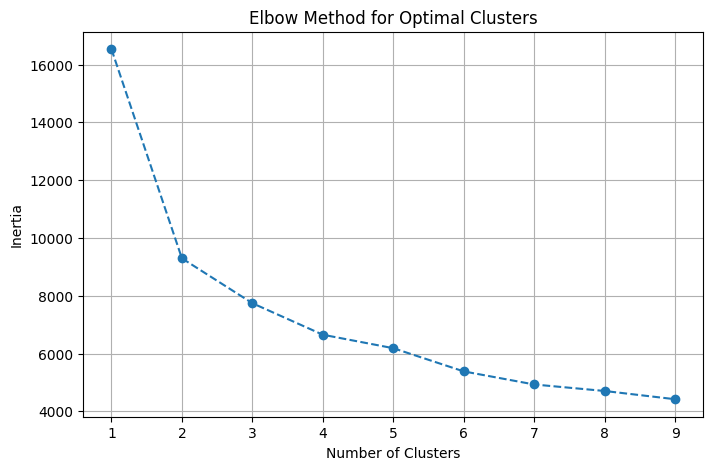

In [67]:
inertia = []
range_clusters = range(1, 10)

for n_clusters in range_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range_clusters, inertia, marker='o', linestyle='--')
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid()
plt.show()


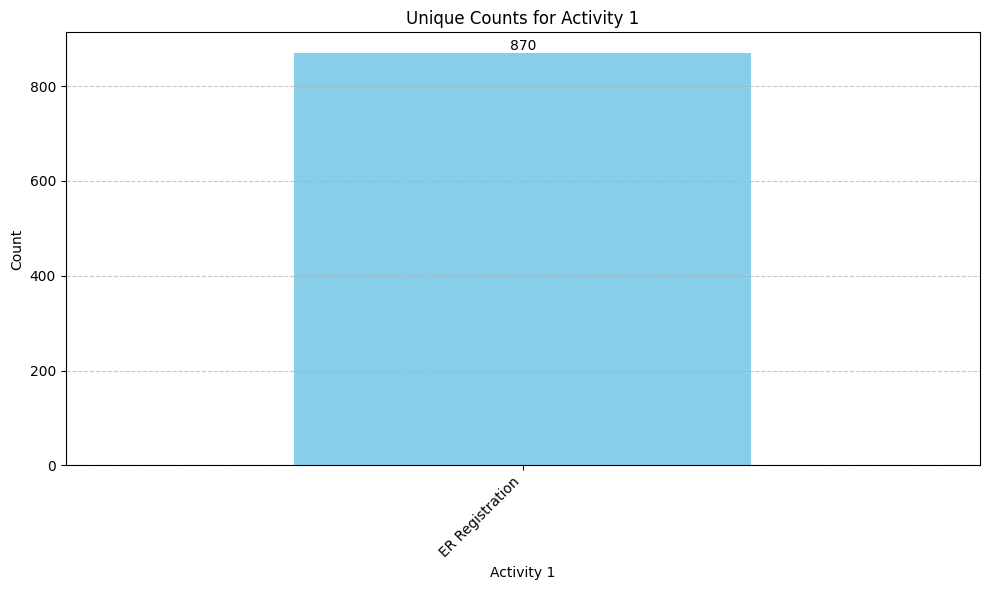

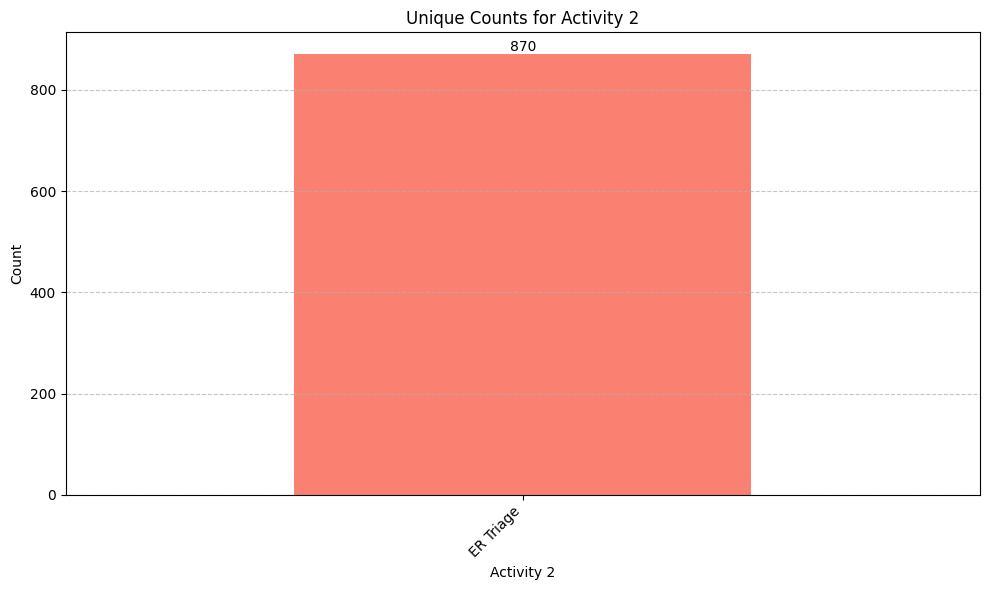

In [68]:
# Count unique values in Activity 1
activity_1_counts = df_act_flow_filtered['Activity 1'].value_counts()

# Count unique values in Activity 2
activity_2_counts = df_act_flow_filtered['Activity 2'].value_counts()

import matplotlib.pyplot as plt

# Count unique values in Activity 1 and Activity 2
activity_1_counts = df_act_flow_filtered['Activity 1'].value_counts()
activity_2_counts = df_act_flow_filtered['Activity 2'].value_counts()

# Function to add value labels on top of the bars
def add_value_labels(ax):
    for p in ax.patches:
        ax.annotate(f"{p.get_height()}", 
                    (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='center', va='bottom', fontsize=10)

# Create bar chart for Activity 1
plt.figure(figsize=(10, 6))
ax1 = activity_1_counts.plot(kind='bar', color='skyblue')
plt.title('Unique Counts for Activity 1')
plt.xlabel('Activity 1')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
add_value_labels(ax1)  # Add numbers on top of bars
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

# Create bar chart for Activity 2
plt.figure(figsize=(10, 6))
ax2 = activity_2_counts.plot(kind='bar', color='salmon')
plt.title('Unique Counts for Activity 2')
plt.xlabel('Activity 2')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
add_value_labels(ax2)  # Add numbers on top of bars
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()



In [69]:
# Step 1: Filter df_act_flow_filtered based on Activity 1 and Activity 2 conditions
valid_case_ids = df_act_flow_filtered[
    (df_act_flow_filtered['Activity 1'] == 'ER Registration') &
    (df_act_flow_filtered['Activity 2'] == 'ER Triage')
]['Case ID']

# Step 2: Retain only rows with valid Case IDs in df_other_attributes and df_diagnosis
df_act_flow_filtered = df_act_flow_filtered[df_act_flow_filtered['Case ID'].isin(valid_case_ids)]
df_other_attributes = df_other_attributes[df_other_attributes['Case ID'].isin(valid_case_ids)]
df_diagnosis = df_diagnosis[df_diagnosis['Case ID'].isin(valid_case_ids)]



In [70]:
df_act_flow_filtered.columns

Index(['Case ID', 'Activity 1', 'Activity 2', 'Activity 3', 'Activity 4',
       'Activity 5', 'Activity 6', 'Activity 7', 'Activity 8', 'Activity 9',
       'Activity 10', 'Activity 11', 'Activity 12', 'Activity 13',
       'Activity 14', 'Activity 15', 'Activity 16', 'Activity 17',
       'Activity 18', 'Activity 19', 'Activity 20', 'Activity 21',
       'Activity 22', 'Activity 23', 'Activity 24', 'Activity 25',
       'Activity 26', 'Activity 27', 'Activity 28', 'Activity 29',
       'Activity 30', 'Activity 31', 'Activity 32', 'Activity 33',
       'Activity 34', 'Activity 35', 'Activity 36', 'Activity 37',
       'Activity 38', 'Activity 39', 'Activity 40', 'Activity 41',
       'Activity 42', 'Activity 43', 'Activity 44', 'Activity 45',
       'Activity 46', 'Activity 47', 'Activity 48', 'Activity 49',
       'Non-NaN Count', 'Final Activity'],
      dtype='object')

In [71]:
# Select the activity columns
activity_columns = [f'Activity {i}' for i in range(1, 30)]  # Activity 1 to Activity 29

# Function to find the last non-null activity in each row
def get_final_activity(row):
    for activity in reversed(activity_columns):
        if pd.notnull(row[activity]):
            return row[activity]
    return None  # Return None if all activities are NaN

# Apply the function to each row and create the 'Final Activity' column
df_act_flow_filtered['Final Activity'] = df_act_flow_filtered.apply(get_final_activity, axis=1)

# Verify the result
print(df_act_flow_filtered[['Case ID'] + activity_columns + ['Final Activity']].head())


  Case ID       Activity 1 Activity 2        Activity 3  Activity 4  \
1       B  ER Registration  ER Triage               CRP  LacticAcid   
2       C  ER Registration  ER Triage  ER Sepsis Triage  Leucocytes   
3       D  ER Registration  ER Triage  ER Sepsis Triage         CRP   
4       E  ER Registration  ER Triage  ER Sepsis Triage   IV Liquid   
5       F  ER Registration  ER Triage  ER Sepsis Triage  Leucocytes   

   Activity 5        Activity 6      Activity 7      Activity 8    Activity 9  \
1  Leucocytes  ER Sepsis Triage       IV Liquid  IV Antibiotics  Admission NC   
2         CRP         IV Liquid  IV Antibiotics    Admission NC  Admission NC   
3  LacticAcid        Leucocytes       IV Liquid  IV Antibiotics  Admission NC   
4         CRP        Leucocytes      LacticAcid  IV Antibiotics           NaN   
5         CRP        LacticAcid  IV Antibiotics       IV Liquid  Admission NC   

   ... Activity 21 Activity 22 Activity 23 Activity 24 Activity 25  \
1  ...         N

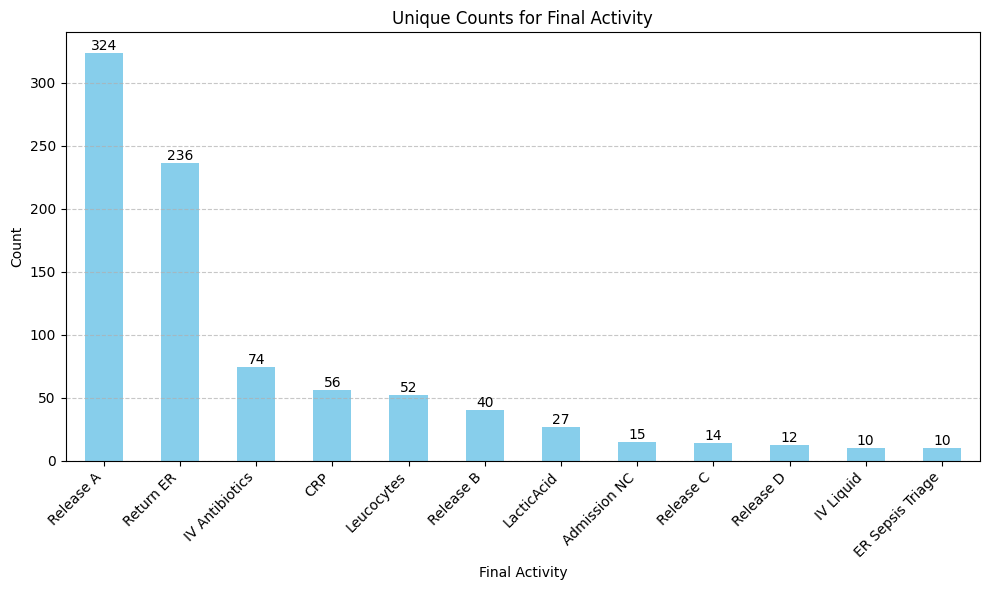

In [72]:

#create a bar chart for the 'Final Activity' column
final_activity_counts = df_act_flow_filtered['Final Activity'].value_counts()
plt.figure(figsize=(10, 6))
ax = final_activity_counts.plot(kind='bar', color='skyblue')
plt.title('Unique Counts for Final Activity')
plt.xlabel('Final Activity')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
add_value_labels(ax)  # Add numbers on top of bars
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [73]:
# Step 1: Identify rows where 'Final Activity' is either 'ER Triage' or 'Release E'
invalid_case_ids = df_act_flow_filtered[
    df_act_flow_filtered['Final Activity'].isin(['ER Triage', 'Release E'])
]['Case ID']

# Step 2: Remove the rows from df_act_flow_filtered, df_other_attributes, and df_diagnosis based on invalid_case_ids
df_act_flow_filtered = df_act_flow_filtered[~df_act_flow_filtered['Case ID'].isin(invalid_case_ids)]
df_other_attributes = df_other_attributes[~df_other_attributes['Case ID'].isin(invalid_case_ids)]
df_diagnosis = df_diagnosis[~df_diagnosis['Case ID'].isin(invalid_case_ids)]

df_act_flow_filtered.shape

(870, 52)

In [74]:
df_act_flow_filtered.to_csv('Sepsis_Activity_Flow.csv', index=False)
df_other_attributes.to_csv('Sepsis_Other_Attributes.csv', index=False)
df_diagnosis.to_csv('Sepsis_Diagnosis.csv', index=False)

In [75]:
df_act_flow_filtered.columns

Index(['Case ID', 'Activity 1', 'Activity 2', 'Activity 3', 'Activity 4',
       'Activity 5', 'Activity 6', 'Activity 7', 'Activity 8', 'Activity 9',
       'Activity 10', 'Activity 11', 'Activity 12', 'Activity 13',
       'Activity 14', 'Activity 15', 'Activity 16', 'Activity 17',
       'Activity 18', 'Activity 19', 'Activity 20', 'Activity 21',
       'Activity 22', 'Activity 23', 'Activity 24', 'Activity 25',
       'Activity 26', 'Activity 27', 'Activity 28', 'Activity 29',
       'Activity 30', 'Activity 31', 'Activity 32', 'Activity 33',
       'Activity 34', 'Activity 35', 'Activity 36', 'Activity 37',
       'Activity 38', 'Activity 39', 'Activity 40', 'Activity 41',
       'Activity 42', 'Activity 43', 'Activity 44', 'Activity 45',
       'Activity 46', 'Activity 47', 'Activity 48', 'Activity 49',
       'Non-NaN Count', 'Final Activity'],
      dtype='object')

In [76]:
df_other_attributes.columns

Index(['Case ID', 'InfectionSuspected', 'DiagnosticBlood', 'DisfuncOrg',
       'SIRSCritTachypnea', 'Hypotensie', 'SIRSCritHeartRate', 'Infusion',
       'DiagnosticArtAstrup', 'Age', 'DiagnosticIC', 'DiagnosticSputum',
       'SIRSCriteria2OrMore', 'DiagnosticXthorax', 'SIRSCritTemperature',
       'DiagnosticUrinaryCulture', 'DiagnosticLacticAcid',
       'DiagnosticUrinarySediment', 'DiagnosticECG', 'Cluster'],
      dtype='object')

In [77]:
df_diagnosis.columns

Index(['Case ID', 'Activity', 'Leucocytes', 'CRP', 'LacticAcid'], dtype='object')

In [78]:
# Merge merged_dfsets on 'Case ID'
merged_df = (
    df_act_flow_filtered
    .merge(df_diagnosis, on="Case ID", how="left")
    .merge(df_other_attributes, on="Case ID", how="left")
)
merged_df.to_csv('Sepsis_Merged.csv', index=False)
# Display a summary of the merged merged_dfset
merged_df.head()


,Case ID,Activity 1,Activity 2,Activity 3,Activity 4,Activity 5,Activity 6,Activity 7,Activity 8,Activity 9,...,DiagnosticIC,DiagnosticSputum,SIRSCriteria2OrMore,DiagnosticXthorax,SIRSCritTemperature,DiagnosticUrinaryCulture,DiagnosticLacticAcid,DiagnosticUrinarySediment,DiagnosticECG,Cluster
0,B,ER Registration,ER Triage,CRP,LacticAcid,Leucocytes,ER Sepsis Triage,IV Liquid,IV Antibiotics,Admission NC,...,True,True,True,True,True,True,True,True,True,1
1,B,ER Registration,ER Triage,CRP,LacticAcid,Leucocytes,ER Sepsis Triage,IV Liquid,IV Antibiotics,Admission NC,...,True,True,True,True,True,True,True,True,True,1
2,B,ER Registration,ER Triage,CRP,LacticAcid,Leucocytes,ER Sepsis Triage,IV Liquid,IV Antibiotics,Admission NC,...,True,True,True,True,True,True,True,True,True,1
3,B,ER Registration,ER Triage,CRP,LacticAcid,Leucocytes,ER Sepsis Triage,IV Liquid,IV Antibiotics,Admission NC,...,True,True,True,True,True,True,True,True,True,1
4,B,ER Registration,ER Triage,CRP,LacticAcid,Leucocytes,ER Sepsis Triage,IV Liquid,IV Antibiotics,Admission NC,...,True,True,True,True,True,True,True,True,True,1


In [79]:
merged_df.columns

Index(['Case ID', 'Activity 1', 'Activity 2', 'Activity 3', 'Activity 4',
       'Activity 5', 'Activity 6', 'Activity 7', 'Activity 8', 'Activity 9',
       'Activity 10', 'Activity 11', 'Activity 12', 'Activity 13',
       'Activity 14', 'Activity 15', 'Activity 16', 'Activity 17',
       'Activity 18', 'Activity 19', 'Activity 20', 'Activity 21',
       'Activity 22', 'Activity 23', 'Activity 24', 'Activity 25',
       'Activity 26', 'Activity 27', 'Activity 28', 'Activity 29',
       'Activity 30', 'Activity 31', 'Activity 32', 'Activity 33',
       'Activity 34', 'Activity 35', 'Activity 36', 'Activity 37',
       'Activity 38', 'Activity 39', 'Activity 40', 'Activity 41',
       'Activity 42', 'Activity 43', 'Activity 44', 'Activity 45',
       'Activity 46', 'Activity 47', 'Activity 48', 'Activity 49',
       'Non-NaN Count', 'Final Activity', 'Activity', 'Leucocytes', 'CRP',
       'LacticAcid', 'InfectionSuspected', 'DiagnosticBlood', 'DisfuncOrg',
       'SIRSCritTachypnea', 

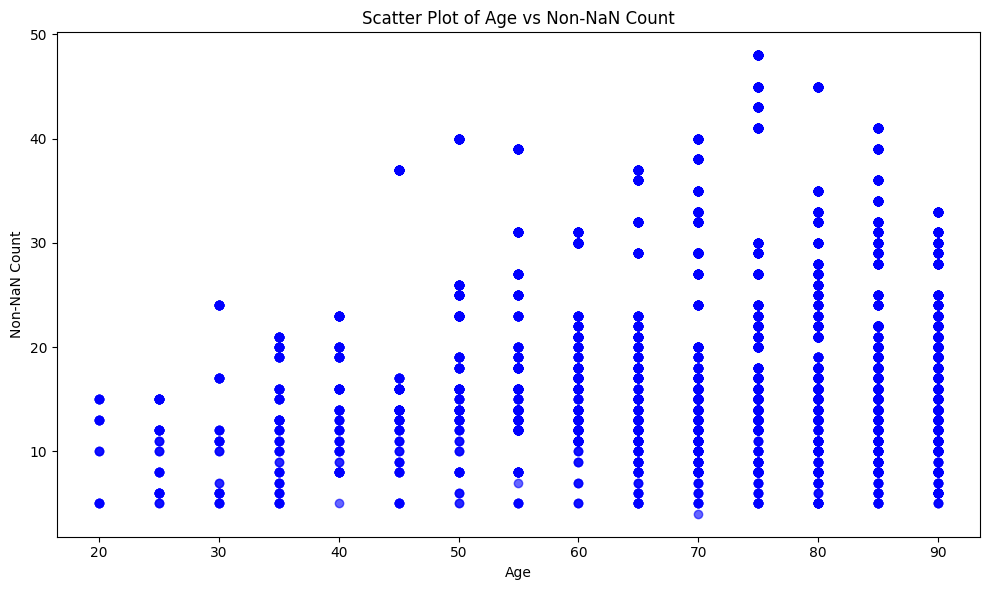

In [80]:
import matplotlib.pyplot as plt

# Scatter plot of Age vs Non-NaN Count
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['Age'], merged_df['Non-NaN Count'], color='blue', alpha=0.6)

# Add labels and title
plt.title('Scatter Plot of Age vs Non-NaN Count')
plt.xlabel('Age')
plt.ylabel('Non-NaN Count')

# Display the plot
plt.tight_layout()
plt.show()


In [81]:
import pandas as pd

# Step 1: Melt the data to a long format
activity_columns = [f"Activity {i}" for i in range(1, 50)]  # Activity 1 to Activity 49
melted_df = merged_df.melt(
    id_vars=['Case ID', 'Leucocytes', 'CRP', 'LacticAcid'], 
    value_vars=activity_columns, 
    var_name='ActivityOrder', 
    value_name='Activity_Value'  # Changed from 'Activity' to 'Activity_Value'
)

# Convert ActivityOrder to numeric for ordering
melted_df['ActivityOrder'] = melted_df['ActivityOrder'].str.extract('(\d+)').astype(int)

# Step 2: Sort by Case ID and ActivityOrder, then create CurrentActivity and NextActivity
melted_df = melted_df.sort_values(['Case ID', 'ActivityOrder'])
melted_df['NextActivity'] = melted_df.groupby('Case ID')['Activity_Value'].shift(-1)

# Drop rows where NextActivity is NaN (end of sequence)
melted_df = melted_df.dropna(subset=['NextActivity'])

# Step 3: Analyze Leucocytes, CRP, and LacticAcid for CurrentActivity -> NextActivity transitions
# Group by CurrentActivity -> NextActivity and calculate stats for Leucocytes
leucocytes_df = (
    melted_df.groupby(['Activity_Value', 'NextActivity'])['Leucocytes']
    .agg(['mean', 'min', 'max'])
    .reset_index()
    .rename(columns={'mean': 'Leucocytes_Mean', 'min': 'Leucocytes_Min', 'max': 'Leucocytes_Max'})
)

# Group by CurrentActivity -> NextActivity and calculate stats for CRP
crp_df = (
    melted_df.groupby(['Activity_Value', 'NextActivity'])['CRP']
    .agg(['mean', 'min', 'max'])
    .reset_index()
    .rename(columns={'mean': 'CRP_Mean', 'min': 'CRP_Min', 'max': 'CRP_Max'})
)

# Group by CurrentActivity -> NextActivity and calculate stats for LacticAcid
lactic_acid_df = (
    melted_df.groupby(['Activity_Value', 'NextActivity'])['LacticAcid']
    .agg(['mean', 'min', 'max'])
    .reset_index()
    .rename(columns={'mean': 'LacticAcid_Mean', 'min': 'LacticAcid_Min', 'max': 'LacticAcid_Max'})
)




In [82]:
melted_df.head()

,Case ID,Leucocytes,CRP,LacticAcid,ActivityOrder,Activity_Value,NextActivity
107,AA,8.6,NaN,NaN,1,ER Registration,ER Registration
108,AA,NaN,NaN,1.4,1,ER Registration,ER Registration
109,AA,NaN,23.0,NaN,1,ER Registration,ER Triage
6151,AA,8.6,NaN,NaN,2,ER Triage,ER Triage
6152,AA,NaN,NaN,1.4,2,ER Triage,ER Triage


In [83]:
leucocytes_df.head()

,Activity_Value,NextActivity,Leucocytes_Mean,Leucocytes_Min,Leucocytes_Max
0,Admission IC,Admission IC,16.214421,1.8,122.0
1,Admission IC,Admission NC,9.600000,9.6,9.6
2,Admission IC,CRP,9.841667,3.8,15.2
3,Admission IC,ER Sepsis Triage,NaN,NaN,NaN
4,Admission IC,LacticAcid,9.600000,2.1,15.2


In [84]:
crp_df.head()

,Activity_Value,NextActivity,CRP_Mean,CRP_Min,CRP_Max
0,Admission IC,Admission IC,138.141553,5.0,573.0
1,Admission IC,Admission NC,141.500000,78.0,205.0
2,Admission IC,CRP,68.090909,20.0,155.0
3,Admission IC,ER Sepsis Triage,77.000000,77.0,77.0
4,Admission IC,LacticAcid,88.454545,25.0,157.0


In [85]:
lactic_acid_df.head()

,Activity_Value,NextActivity,LacticAcid_Mean,LacticAcid_Min,LacticAcid_Max
0,Admission IC,Admission IC,2.135465,0.3,14.9
1,Admission IC,Admission NC,3.500000,3.5,3.5
2,Admission IC,CRP,8.050000,1.2,14.9
3,Admission IC,ER Sepsis Triage,NaN,NaN,NaN
4,Admission IC,LacticAcid,2.480000,0.6,7.4


In [86]:

# Step 4: Output results
print("Leucocytes Analysis:")
print(leucocytes_df)

print("\nCRP Analysis:")
print(crp_df)

print("\nLactic Acid Analysis:")
print(lactic_acid_df)


Leucocytes Analysis:
    Activity_Value      NextActivity  Leucocytes_Mean  Leucocytes_Min  \
0     Admission IC      Admission IC        16.214421             1.8   
1     Admission IC      Admission NC         9.600000             9.6   
2     Admission IC               CRP         9.841667             3.8   
3     Admission IC  ER Sepsis Triage              NaN             NaN   
4     Admission IC        LacticAcid         9.600000             2.1   
..             ...               ...              ...             ...   
99       Release D         Return ER        10.385714             6.7   
100      Release E         Release E        11.168421             5.0   
101      Release E         Return ER              NaN             NaN   
102      Return ER               CRP        10.350000             2.1   
103      Return ER         Return ER        14.455388             0.2   

     Leucocytes_Max  
0             122.0  
1               9.6  
2              15.2  
3             

In [87]:
import pandas as pd

# Example data (replace with your actual dataframe)
# merged_df should have columns like 'CurrentActivity', 'NextActivity', 'Leucocytes', 'CRP', 'LacticAcid'

# Step 1: Group by 'CurrentActivity' -> 'NextActivity' and analyze Leucocytes
leucocytes_df = (
    merged_df.groupby(['CurrentActivity', 'NextActivity'])['Leucocytes']
    .agg(['mean', 'min', 'max'])
    .reset_index()
    .rename(columns={'mean': 'Leucocytes_Mean', 'min': 'Leucocytes_Min', 'max': 'Leucocytes_Max'})
)

# Step 2: Group by 'CurrentActivity' -> 'NextActivity' and analyze CRP
crp_df = (
    merged_df.groupby(['CurrentActivity', 'NextActivity'])['CRP']
    .agg(['mean', 'min', 'max'])
    .reset_index()
    .rename(columns={'mean': 'CRP_Mean', 'min': 'CRP_Min', 'max': 'CRP_Max'})
)

# Step 3: Group by 'CurrentActivity' -> 'NextActivity' and analyze Lactic Acid
lactic_acid_df = (
    merged_df.groupby(['CurrentActivity', 'NextActivity'])['LacticAcid']
    .agg(['mean', 'min', 'max'])
    .reset_index()
    .rename(columns={'mean': 'LacticAcid_Mean', 'min': 'LacticAcid_Min', 'max': 'LacticAcid_Max'})
)

# Display the results
print("Leucocytes Analysis:")
print(leucocytes_df)

print("\nCRP Analysis:")
print(crp_df)

print("\nLactic Acid Analysis:")
print(lactic_acid_df)


KeyError: 'CurrentActivity'

In [103]:
# Calculate thresholds for diagnostic features from the dataset
leucocytes_threshold = merged_df['Leucocytes'].quantile(0.75)  # 75th percentile
crp_threshold = merged_df['CRP'].quantile(0.75)  # 75th percentile
lactic_acid_threshold = merged_df['LacticAcid'].quantile(0.75)  # 75th percentile

print(f"Leucocytes Threshold: {leucocytes_threshold}")
print(f"CRP Threshold: {crp_threshold}")
print(f"Lactic Acid Threshold: {lactic_acid_threshold}")


Leucocytes Threshold: 15.1
CRP Threshold: 156.0
Lactic Acid Threshold: 2.4


In [64]:
import pandas as pd
import numpy as np


# Extract relevant columns for analysis
diagnosis_df = merged_df[['Case ID', 'Activity', 'Leucocytes', 'CRP', 'LacticAcid']]
activity_flow_df = merged_df[[col for col in merged_df.columns if "Activity" in col or col == 'Case ID']]

# Initialize storage for thresholds
activity_transitions = {}

# Analyze transitions for each case
for case_id, case_group in diagnosis_df.groupby("Case ID"):
    # Get the corresponding activity flow
    activity_row = activity_flow_df[activity_flow_df['Case ID'] == case_id].iloc[0]
    activities = activity_row.dropna().values[1:]  # Exclude 'Case ID'

    # Analyze diagnostic values and their influence on transitions
    for i in range(len(activities) - 1):
        current_activity = activities[i]
        next_activity = activities[i + 1]

        # Get diagnostic values for the current activity
        diag_values = case_group[case_group['Activity'] == current_activity]
        if diag_values.empty:
            continue

        leucocytes = diag_values['Leucocytes'].values[0] if 'Leucocytes' in diag_values else None
        crp = diag_values['CRP'].values[0] if 'CRP' in diag_values else None
        lactic_acid = diag_values['LacticAcid'].values[0] if 'LacticAcid' in diag_values else None

        # Store the transition and values
        key = (current_activity, next_activity)
        if key not in activity_transitions:
            activity_transitions[key] = {'Leucocytes': [], 'CRP': [], 'LacticAcid': []}
        
        if pd.notna(leucocytes):
            activity_transitions[key]['Leucocytes'].append(leucocytes)
        if pd.notna(crp):
            activity_transitions[key]['CRP'].append(crp)
        if pd.notna(lactic_acid):
            activity_transitions[key]['LacticAcid'].append(lactic_acid)

# Calculate thresholds and patterns
transition_rules = {}
for transition, values in activity_transitions.items():
    thresholds = {}
    for test, test_values in values.items():
        if test_values:
            thresholds[test] = {
                'mean': np.mean(test_values),
                'min': np.min(test_values),
                'max': np.max(test_values)
            }
    transition_rules[transition] = thresholds

# Output the identified thresholds and patterns
for transition, thresholds in transition_rules.items():
    print(f"Transition: {transition}")
    for test, stats in thresholds.items():
        print(f"  {test}: Mean={stats['mean']:.2f}, Min={stats['min']:.2f}, Max={stats['max']:.2f}")
    print()


Transition: ('Leucocytes', 'LacticAcid')
  Leucocytes: Mean=13.75, Min=0.20, Max=71.80

Transition: ('LacticAcid', 'CRP')
  LacticAcid: Mean=2.47, Min=0.50, Max=10.00

Transition: ('CRP', 'IV Liquid')
  CRP: Mean=105.43, Min=6.00, Max=434.00

Transition: ('Leucocytes', 'CRP')
  Leucocytes: Mean=14.58, Min=0.20, Max=296.20

Transition: ('CRP', 'LacticAcid')
  CRP: Mean=123.35, Min=5.00, Max=573.00

Transition: ('LacticAcid', 'IV Antibiotics')
  LacticAcid: Mean=2.21, Min=0.60, Max=9.60

Transition: ('LacticAcid', 'Leucocytes')
  LacticAcid: Mean=2.45, Min=0.50, Max=10.00

Transition: ('Leucocytes', 'IV Liquid')
  Leucocytes: Mean=15.84, Min=0.60, Max=163.00

Transition: ('CRP', 'IV Antibiotics')
  CRP: Mean=104.66, Min=6.00, Max=391.00

Transition: ('CRP', 'Leucocytes')
  CRP: Mean=118.12, Min=5.00, Max=573.00

Transition: ('Leucocytes', 'Leucocytes')
  Leucocytes: Mean=14.09, Min=0.20, Max=296.20

Transition: ('CRP', 'CRP')
  CRP: Mean=124.37, Min=5.00, Max=573.00

Transition: ('Leucoc

In [65]:
def predict_next_activity(current_activity, leucocytes=None, crp=None, lactic_acid=None):
    """
    Predict the next activity based on current activity and diagnostic values.
    """
    # Define thresholds for transitions
    transition_rules = {
        ('Leucocytes', 'LacticAcid'): {'Leucocytes': 13.75},
        ('LacticAcid', 'CRP'): {'LacticAcid': 2.47},
        ('CRP', 'IV Liquid'): {'CRP': 105.43},
        ('Leucocytes', 'CRP'): {'Leucocytes': 14.58},
        ('CRP', 'LacticAcid'): {'CRP': 123.35},
        ('LacticAcid', 'IV Antibiotics'): {'LacticAcid': 2.21},
        ('Leucocytes', 'IV Antibiotics'): {'Leucocytes': 15.20},
        ('CRP', 'IV Antibiotics'): {'CRP': 104.66},
        ('CRP', 'Admission NC'): {'CRP': 111.18},
        ('LacticAcid', 'Admission IC'): {'LacticAcid': 4.46},
    }
    
    # Check for a matching transition rule
    for (start, end), thresholds in transition_rules.items():
        if current_activity == start:
            # Check if diagnostic values meet the threshold
            if (
                (leucocytes is None or leucocytes >= thresholds.get('Leucocytes', float('-inf'))) and
                (crp is None or crp >= thresholds.get('CRP', float('-inf'))) and
                (lactic_acid is None or lactic_acid >= thresholds.get('LacticAcid', float('-inf')))
            ):
                return end  # Return the predicted next activity

    # Default: Unable to predict next activity
    return "Unknown"

# Example usage
current_activity = "CRP"
leucocytes = None
crp = 130  # High CRP value
lactic_acid = None

predicted_next_activity = predict_next_activity(current_activity, leucocytes, crp, lactic_acid)
print(f"Predicted Next Activity: {predicted_next_activity}")


Predicted Next Activity: IV Liquid


In [66]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# ---------- STEP 1: DATA PREPROCESSING ----------

# Features
features = [
    'Leucocytes', 'CRP', 'LacticAcid', 'InfectionSuspected', 'DiagnosticBlood',
    'DisfuncOrg', 'SIRSCritTachypnea', 'Hypotensie', 'SIRSCritHeartRate', 'Infusion',
    'DiagnosticArtAstrup', 'Age', 'DiagnosticIC', 'DiagnosticSputum',
    'SIRSCriteria2OrMore', 'DiagnosticXthorax', 'SIRSCritTemperature',
    'DiagnosticUrinaryCulture', 'DiagnosticLacticAcid', 'DiagnosticUrinarySediment', 'DiagnosticECG'
]

# Prepare features (X)
X = merged_df[features]
scaler = StandardScaler()
X['Age'] = scaler.fit_transform(X[['Age']])  # Scale 'Age'

# Prepare storage for models and mappings
models = {}
activity_columns = [f'Activity {i}' for i in range(1, 51)]  # Limit to 50 activities
accuracy_scores = []

# ---------- STEP 2: TRAIN MODELS FOR EACH ACTIVITY ----------

for i in range(3, 51):  # Start from Activity 3
    activity_col = f'Activity {i}'
    
    # Skip if activity column doesn't exist
    if activity_col not in merged_df.columns:
        break
    
    # Get target for the activity
    y = merged_df[activity_col]
    
    # Encode labels dynamically
    unique_labels = y.unique()
    activity_mapping = {label: idx for idx, label in enumerate(unique_labels)}
    y_encoded = y.map(activity_mapping)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)
    
    # Train Random Forest Model
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)

    # Calculate and store accuracy
    y_pred = rf_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy_scores.append(acc)
    
    # Store the model and label mappings
    models[activity_col] = {
        'model': rf_model,
        'mapping': activity_mapping,
        'reverse_mapping': {v: k for k, v in activity_mapping.items()}
    }

# ---------- STEP 3: FUNCTION TO HANDLE DIAGNOSTICS ----------

# Predict next activity based on diagnostic thresholds
def predict_next_activity(current_activity, leucocytes, crp, lactic_acid):
    if current_activity == 'Leucocytes':
        if leucocytes > 15:  # Example threshold
            return 'IV Antibiotics'
        else:
            return 'CRP'
    elif current_activity == 'CRP':
        if crp > 100:  # Example threshold
            return 'IV Antibiotics'
        else:
            return 'LacticAcid'
    elif current_activity == 'LacticAcid':
        if lactic_acid > 2.0:  # Example threshold
            return 'ICU Admit'
        else:
            return 'Discharge'
    else:
        return 'END'

# ---------- STEP 4: PREDICT ACTIVITY SEQUENCE ----------

# Define stopping criteria
stopping_activities = ['Release A', 'Release B', 'Release C', 'Release D', 'Release E', 'Return ER']

def predict_sequence(initial_features, leucocytes, crp, lactic_acid):
    activities_sequence = ['ER Registration', 'ER Triage']  # Start with first two activities
    
    # Iterate through activity predictions
    for i in range(3, 51):
        activity_col = f'Activity {i}'
        if activity_col not in models:
            break
        
        # Predict next activity
        input_data = np.array([initial_features])
        input_data[:, 11] = scaler.transform(input_data[:, [11]])  # Scale 'Age'
        predicted_label = models[activity_col]['model'].predict(input_data)[0]
        predicted_activity = models[activity_col]['reverse_mapping'][predicted_label]
        
        # Stop if activity is NaN
        if pd.isna(predicted_activity):
            break
        # Stop if final activity matches stopping criteria
        if predicted_activity in stopping_activities:
            activities_sequence.append(predicted_activity)
            break
        
        # Append predicted activity to sequence
        activities_sequence.append(predicted_activity)
        
        # Update diagnostic values dynamically
        if predicted_activity == 'Leucocytes':
            predicted_activity = predict_next_activity('Leucocytes', leucocytes, crp, lactic_acid)
        elif predicted_activity == 'CRP':
            predicted_activity = predict_next_activity('CRP', leucocytes, crp, lactic_acid)
        elif predicted_activity == 'LacticAcid':
            predicted_activity = predict_next_activity('LacticAcid', leucocytes, crp, lactic_acid)

    return activities_sequence





C:\Users\hskma\AppData\Local\Temp\ipykernel_19108\1822388116.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Age'] = scaler.fit_transform(X[['Age']])  # Scale 'Age'


Enter patient details:

Predicted Activity Flow: ['ER Registration', 'ER Triage', 'ER Sepsis Triage', 'LacticAcid', 'CRP', 'Leucocytes', 'Admission NC', 'IV Antibiotics', 'Admission NC', 'Leucocytes', 'Leucocytes', 'CRP', 'Leucocytes']

Final Model Accuracy Score: 0.8443


f:\Code\GitHub\Process_Analytics\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
f:\Code\GitHub\Process_Analytics\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
f:\Code\GitHub\Process_Analytics\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
f:\Code\GitHub\Process_Analytics\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
f:\Code\GitHub\Process_Analytics\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardSca

In [69]:
# ---------- STEP 5: USER INPUT AND TEST ----------

# Collect user input
print("Enter patient details:")
age = float(input("Age: "))
infection_suspected = int(input("Infection Suspected (0 or 1): "))
disfunc_org = int(input("Organ Dysfunction (0 or 1): "))
sirs_criteria = int(input("SIRS Criteria 2 or more (0 or 1): "))
hypotensie = int(input("Hypotension (0 or 1): "))
diagnostic_blood = int(input("Diagnostic Blood (0 or 1): "))
diagnostic_lactic_acid = int(input("Diagnostic Lactic Acid (0 or 1): "))

# Initial features
example_input = [
    40, 90, 15.5, infection_suspected, diagnostic_blood, disfunc_org, 0, hypotensie, 0, 0,
    0, age, 1, 0, sirs_criteria, 0, 0, 1, diagnostic_lactic_acid, 0, 0
]

# Initial diagnostic values
leucocytes = 100
crp = 150
lactic_acid = 10.5

predicted_sequence = predict_sequence(example_input, leucocytes, crp, lactic_acid)

# Output the final sequence
print("\nPredicted Activity Flow:", predicted_sequence)

# Print the final accuracy score
final_accuracy = np.mean(accuracy_scores)
print("\nFinal Model Accuracy Score:", round(final_accuracy, 4))

Enter patient details:

Predicted Activity Flow: ['ER Registration', 'ER Triage', 'ER Sepsis Triage', 'LacticAcid', 'CRP', 'Leucocytes', 'Admission NC', 'IV Antibiotics', 'Admission NC', 'Leucocytes', 'Leucocytes', 'CRP', 'Leucocytes']

Final Model Accuracy Score: 0.8443


f:\Code\GitHub\Process_Analytics\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
f:\Code\GitHub\Process_Analytics\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
f:\Code\GitHub\Process_Analytics\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
f:\Code\GitHub\Process_Analytics\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
f:\Code\GitHub\Process_Analytics\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardSca

In [58]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# ---------- STEP 1: DATA PREPROCESSING ----------

# Features
features = [
    'Leucocytes', 'CRP', 'LacticAcid', 'InfectionSuspected', 'DiagnosticBlood',
    'DisfuncOrg', 'SIRSCritTachypnea', 'Hypotensie', 'SIRSCritHeartRate', 'Infusion',
    'DiagnosticArtAstrup', 'Age', 'DiagnosticIC', 'DiagnosticSputum',
    'SIRSCriteria2OrMore', 'DiagnosticXthorax', 'SIRSCritTemperature',
    'DiagnosticUrinaryCulture', 'DiagnosticLacticAcid', 'DiagnosticUrinarySediment', 'DiagnosticECG'
]

# Prepare features (X)
X = merged_df[features]
scaler = StandardScaler()
X['Age'] = scaler.fit_transform(X[['Age']])  # Scale 'Age'

# Prepare storage for models and mappings
models = {}
activity_columns = [f'Activity {i}' for i in range(1, 51)]  # Limit to 50 activities
accuracy_scores = []

# ---------- STEP 2: TRAIN MODELS FOR EACH ACTIVITY ----------

for i in range(3, 51):  # Start from Activity 3
    activity_col = f'Activity {i}'
    
    # Skip if activity column doesn't exist
    if activity_col not in merged_df.columns:
        break
    
    # Get target for the activity
    y = merged_df[activity_col]
    
    # Encode labels dynamically
    unique_labels = y.unique()
    activity_mapping = {label: idx for idx, label in enumerate(unique_labels)}
    y_encoded = y.map(activity_mapping)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)
    
    # Train Random Forest Model
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)

    # Calculate and store accuracy
    y_pred = rf_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy_scores.append(acc)
    
    # Store the model and label mappings
    models[activity_col] = {
        'model': rf_model,
        'mapping': activity_mapping,
        'reverse_mapping': {v: k for k, v in activity_mapping.items()}
    }

# ---------- STEP 3: FUNCTION TO HANDLE DIAGNOSTICS ----------

# Predict next activity based on test values
def predict_next_activity(current_activity, leucocytes, crp, lactic_acid):
    if current_activity == 'Leucocytes':
        if leucocytes > 15:  # Example threshold
            return 'IV Antibiotics'
        else:
            return 'CRP'
    elif current_activity == 'CRP':
        if crp > 100:  # Example threshold
            return 'IV Antibiotics'
        else:
            return 'LacticAcid'
    elif current_activity == 'LacticAcid':
        if lactic_acid > 2.0:  # Example threshold
            return 'ICU Admit'
        else:
            return 'Discharge'
    else:
        return 'END'

# ---------- STEP 4: PREDICT ACTIVITY SEQUENCE ----------

# Define stopping criteria
stopping_activities = ['Release A', 'Release B', 'Release C', 'Release D', 'Release E', 'Return ER']

def predict_sequence(initial_features, leucocytes, crp, lactic_acid):
    activities_sequence = ['ER Registration', 'ER Triage']  # Start with first two activities
    
    # Iterate through activity predictions
    for i in range(3, 51):
        activity_col = f'Activity {i}'
        if activity_col not in models:
            break
        
        # Predict next activity
        input_data = np.array([initial_features])
        input_data[:, 11] = scaler.transform(input_data[:, [11]])  # Scale 'Age'
        predicted_label = models[activity_col]['model'].predict(input_data)[0]
        predicted_activity = models[activity_col]['reverse_mapping'][predicted_label]
        
        # Stop if activity is NaN
        if pd.isna(predicted_activity):
            break
        # Stop if final activity matches stopping criteria
        if predicted_activity in stopping_activities:
            activities_sequence.append(predicted_activity)
            break
        
        # Append predicted activity to sequence
        activities_sequence.append(predicted_activity)
        
        # Update diagnostic values dynamically
        if predicted_activity == 'Leucocytes':
            predicted_activity = predict_next_activity('Leucocytes', leucocytes, crp, lactic_acid)
        elif predicted_activity == 'CRP':
            predicted_activity = predict_next_activity('CRP', leucocytes, crp, lactic_acid)
        elif predicted_activity == 'LacticAcid':
            predicted_activity = predict_next_activity('LacticAcid', leucocytes, crp, lactic_acid)

    return activities_sequence

# ---------- STEP 5: USER INPUT AND TEST ----------

# Collect user input
print("Enter patient details:")
age = float(input("Age: "))
infection_suspected = int(input("Infection Suspected (0 or 1): "))
disfunc_org = int(input("Organ Dysfunction (0 or 1): "))
sirs_criteria = int(input("SIRS Criteria 2 or more (0 or 1): "))
hypotensie = int(input("Hypotension (0 or 1): "))
diagnostic_blood = int(input("Diagnostic Blood (0 or 1): "))
diagnostic_lactic_acid = int(input("Diagnostic Lactic Acid (0 or 1): "))

# Initial features
example_input = [
    40, 90, 15.5, infection_suspected, diagnostic_blood, disfunc_org, 0, hypotensie, 0, 0,
    0, age, 1, 0, sirs_criteria, 0, 0, 1, diagnostic_lactic_acid, 0, 0
]

# Initial diagnostic values
leucocytes = 10
crp = 50
lactic_acid = 1.5

predicted_sequence = predict_sequence(example_input, leucocytes, crp, lactic_acid)

# Output the final sequence
print("\nPredicted Activity Flow:", predicted_sequence)

# Print the final accuracy score
final_accuracy = np.mean(accuracy_scores)
print("\nFinal Model Accuracy Score:", round(final_accuracy, 4))


C:\Users\hskma\AppData\Local\Temp\ipykernel_19108\1379666347.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Age'] = scaler.fit_transform(X[['Age']])  # Scale 'Age'


Enter patient details:

Predicted Activity Flow: ['ER Registration', 'ER Triage', 'ER Sepsis Triage', 'LacticAcid', 'CRP', 'Leucocytes', 'Admission NC', 'IV Antibiotics', 'Admission NC', 'Leucocytes', 'Leucocytes', 'CRP', 'Leucocytes']

Final Model Accuracy Score: 0.8443


f:\Code\GitHub\Process_Analytics\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
f:\Code\GitHub\Process_Analytics\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
f:\Code\GitHub\Process_Analytics\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
f:\Code\GitHub\Process_Analytics\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
f:\Code\GitHub\Process_Analytics\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardSca

In [59]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# ---------- STEP 1: DATA PREPROCESSING ----------

# Features
features = [
    'Leucocytes', 'CRP', 'LacticAcid', 'InfectionSuspected', 'DiagnosticBlood',
    'DisfuncOrg', 'SIRSCritTachypnea', 'Hypotensie', 'SIRSCritHeartRate', 'Infusion',
    'DiagnosticArtAstrup', 'Age', 'DiagnosticIC', 'DiagnosticSputum',
    'SIRSCriteria2OrMore', 'DiagnosticXthorax', 'SIRSCritTemperature',
    'DiagnosticUrinaryCulture', 'DiagnosticLacticAcid', 'DiagnosticUrinarySediment', 'DiagnosticECG'
]

# Prepare features (X)
X = merged_df[features]
scaler = StandardScaler()
X['Age'] = scaler.fit_transform(X[['Age']])  # Scale 'Age'

# Prepare storage for models and mappings
models = {}
activity_columns = [f'Activity {i}' for i in range(1, 51)]  # Limit to 50 activities
accuracy_scores = []

# ---------- STEP 2: TRAIN MODELS FOR EACH ACTIVITY ----------

for i in range(3, 51):  # Start from Activity 3
    activity_col = f'Activity {i}'
    
    # Skip if activity column doesn't exist
    if activity_col not in merged_df.columns:
        break
    
    # Get target for the activity
    y = merged_df[activity_col]
    
    # Encode labels dynamically
    unique_labels = y.unique()
    activity_mapping = {label: idx for idx, label in enumerate(unique_labels)}
    y_encoded = y.map(activity_mapping)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)
    
    # Train Random Forest Model
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)

    # Calculate and store accuracy
    y_pred = rf_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy_scores.append(acc)
    
    # Store the model and label mappings
    models[activity_col] = {
        'model': rf_model,
        'mapping': activity_mapping,
        'reverse_mapping': {v: k for k, v in activity_mapping.items()}
    }

# ---------- STEP 3: PREDICT ACTIVITY SEQUENCE ----------

# Define stopping criteria
stopping_activities = ['Release A', 'Release B', 'Release C', 'Release D', 'Release E', 'Return ER']

def predict_sequence(initial_features):
    activities_sequence = ['ER Registration', 'ER Triage']  # Start with first two activities
    
    # Iterate through activity predictions
    for i in range(3, 51):
        activity_col = f'Activity {i}'
        if activity_col not in models:
            break
        
        # Predict next activity
        input_data = np.array([initial_features])
        input_data[:, 11] = scaler.transform(input_data[:, [11]])  # Scale 'Age'
        predicted_label = models[activity_col]['model'].predict(input_data)[0]
        predicted_activity = models[activity_col]['reverse_mapping'][predicted_label]
        
        # Stop if activity is NaN
        if pd.isna(predicted_activity):
            break
        # Stop if final activity matches stopping criteria
        if predicted_activity in stopping_activities:
            activities_sequence.append(predicted_activity)
            break
        
        # Append predicted activity to sequence
        activities_sequence.append(predicted_activity)
        
        # Update diagnostic values dynamically
        if predicted_activity == 'Leucocytes':
            initial_features[0] += 1
        elif predicted_activity == 'CRP':
            initial_features[1] += 5
        elif predicted_activity == 'LacticAcid':
            initial_features[2] += 0.2
    
    return activities_sequence

# ---------- STEP 4: TEST THE PIPELINE ----------

# Example input
example_input = [
    40, 90, 15.5, 0, 1, 0, 0, 1, 1, 0,
    0, 70, 1, 0, 0, 0, 0, 1, 1, 0, 1  # Replace with actual data
]

predicted_sequence = predict_sequence(example_input)

# Output the final sequence
print("\nPredicted Activity Flow:", predicted_sequence)

# Print the final accuracy score
final_accuracy = np.mean(accuracy_scores)
print("\nFinal Model Accuracy Score:", round(final_accuracy, 4))

C:\Users\hskma\AppData\Local\Temp\ipykernel_19108\4050128442.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Age'] = scaler.fit_transform(X[['Age']])  # Scale 'Age'



Predicted Activity Flow: ['ER Registration', 'ER Triage', 'ER Sepsis Triage', 'Leucocytes', 'CRP', 'CRP', 'Admission NC', 'Leucocytes']

Final Model Accuracy Score: 0.8443


f:\Code\GitHub\Process_Analytics\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
f:\Code\GitHub\Process_Analytics\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
f:\Code\GitHub\Process_Analytics\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
f:\Code\GitHub\Process_Analytics\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
f:\Code\GitHub\Process_Analytics\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardSca

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

# ---------- STEP 1: MODEL TO PREDICT SECOND ACTIVITY ----------

# Select features from Other Attributes dataset
X = merged_df[['InfectionSuspected', 'DisfuncOrg', 'SIRSCritTachypnea', 'Hypotensie',
              'SIRSCritHeartRate', 'SIRSCriteria2OrMore', 'SIRSCritTemperature',
              'DiagnosticBlood', 'DiagnosticArtAstrup', 'Age', 'DiagnosticIC',
              'DiagnosticSputum', 'DiagnosticXthorax', 'DiagnosticLacticAcid',
              'DiagnosticUrinaryCulture', 'DiagnosticUrinarySediment', 'DiagnosticECG',
              'Infusion']]  # Use all relevant columns

# Target: Second Activity
y = merged_df['Activity 2']  # Assuming 'Activity_2' represents the second activity

# Encode target variable
activity_mapping = {activity: idx for idx, activity in enumerate(y.unique())}
y_encoded = y.map(activity_mapping)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Scale only 'Age' column
scaler = StandardScaler()
X_train['Age'] = scaler.fit_transform(X_train[['Age']])  # Scale 'Age'
X_test['Age'] = scaler.transform(X_test[['Age']])       # Scale 'Age'

# Train model
rf_second_activity = RandomForestClassifier(n_estimators=100, random_state=42)
rf_second_activity.fit(X_train, y_train)

# Evaluate model
y_pred = rf_second_activity.predict(X_test)
print("Accuracy for Second Activity:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ---------- STEP 2: RULES FOR SUBSEQUENT ACTIVITIES ----------

# # Function to predict next activity based on diagnosis values
# def predict_next_activity(current_activity, leucocytes, crp, lactic_acid):
#     if current_activity == 'Leucocytes':
#         if leucocytes > 15:  # Example threshold
#             return 'IV Antibiotics'
#         else:
#             return 'CRP'
#     elif current_activity == 'CRP':
#         if crp > 100:  # Example threshold
#             return 'IV Antibiotics'
#         else:
#             return 'LacticAcid'
#     elif current_activity == 'LacticAcid':
#         if lactic_acid > 2.0:  # Example threshold
#             return 'ICU Admit'
#         else:
#             return 'Discharge'
#     else:
#         return 'END'

# ---------- STEP 3: FINAL PREDICTION PIPELINE ----------

def predict_pipeline():
    print("\n--- Patient Information ---")
    # Collect user input
    age = float(input("Age: "))
    infection_suspected = int(input("Infection Suspected (0 or 1): "))
    disfunc_org = int(input("Organ Dysfunction (0 or 1): "))
    sirs_criteria = int(input("SIRS Criteria 2 or more (0 or 1): "))
    hypotensie = int(input("Hypotension (0 or 1): "))
    diagnostic_blood = int(input("Diagnostic Blood (0 or 1): "))
    diagnostic_lactic_acid = int(input("Diagnostic Lactic Acid (0 or 1): "))

    # Predict Second Activity
    input_features = np.array([[infection_suspected, disfunc_org, 0, hypotensie, 0,
                                sirs_criteria, 0, diagnostic_blood, 0, age,
                                0, 0, 0, diagnostic_lactic_acid, 0, 0, 0, 0]])  # Replace 0s if more inputs are needed
    input_scaled = scaler.transform(input_features[:, [9]])  # Scale only 'Age'
    input_features[:, 9] = input_scaled[:, 0]  # Replace scaled 'Age'

    second_activity_pred = rf_second_activity.predict(input_features)[0]
    second_activity = [key for key, value in activity_mapping.items() if value == second_activity_pred][0]
    print(f"Predicted Second Activity: {second_activity}")

    # Predict Subsequent Activities
    # current_activity = second_activity
    # while current_activity != 'END':
    #     # Get diagnostic values
    #     leucocytes = float(input(f"{current_activity} - Leucocytes: "))
    #     crp = float(input(f"{current_activity} - CRP: "))
    #     lactic_acid = float(input(f"{current_activity} - Lactic Acid: "))

    #     # Predict next activity based on diagnosis trends
    #     next_activity = predict_next_activity(current_activity, leucocytes, crp, lactic_acid)
    #     print(f"Next Activity: {next_activity}")

    #     # Update current activity
    #     if next_activity == 'END':
    #         break
    #     current_activity = next_activity

# Call the pipeline
predict_pipeline()


Accuracy for Second Activity: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1814

    accuracy                           1.00      1814
   macro avg       1.00      1.00      1.00      1814
weighted avg       1.00      1.00      1.00      1814


--- Patient Information ---
Predicted Second Activity: ER Triage


f:\Code\GitHub\Process_Analytics\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
f:\Code\GitHub\Process_Analytics\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
